# LDA en Python: Reducción de dimensión y visualización (dataset lineal)

Este cuaderno aplica **Análisis Discriminante Lineal (LDA)** para reducir la dimensión del primer conjunto de datos (3 características lineales) y visualizar la proyección en 1D.


## ¿Qué es LDA?

El **Análisis Discriminante Lineal (LDA)** busca una combinación lineal de variables que **maximiza la separación entre clases**. 
A diferencia de PCA (que busca máxima varianza global), LDA optimiza la **discriminación entre grupos**.

**Referencias integradas:**
- Müller & Guido (2017) subrayan su utilidad para problemas supervisados con clases conocidas.
- Pedregosa et al. (2011) documentan la implementación en `scikit-learn`.
- Géron (2022) ofrece una introducción práctica con ejemplos comparando LDA y PCA.


## 1) Generar el conjunto de datos lineal (3 características)

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

X1 = np.random.rand(100)
X2 = 2 * X1 + np.random.normal(0, 0.1, 100)
X3 = 3 * X1 + np.random.normal(0, 0.1, 100)
y_reg = 3*X1 + 2*X2 + X3 + np.random.normal(0, 0.1, 100)

df_linear = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y_reg})
df_linear.head()

,X1,X2,X3,y
0,0.374540,0.757785,1.124921,3.784017
1,0.950714,1.871528,2.997496,9.532673
2,0.731994,1.473164,2.169516,7.318806
3,0.598658,0.998560,2.067992,5.822557
4,0.156019,0.290070,0.530623,1.590170


## 2) Crear etiquetas de clase

Para aplicar LDA, requerimos una variable objetivo **categórica**. Aquí, creamos dos clases dividiendo `y` por su media.


In [2]:
df_linear['Clase'] = (df_linear['y'] > df_linear['y'].mean()).astype(int)
X = df_linear[['X1', 'X2', 'X3']].values
y = df_linear['Clase'].values

df_linear[['X1','X2','X3','y','Clase']].head()

,X1,X2,X3,y,Clase
0,0.374540,0.757785,1.124921,3.784017,0
1,0.950714,1.871528,2.997496,9.532673,1
2,0.731994,1.473164,2.169516,7.318806,1
3,0.598658,0.998560,2.067992,5.822557,1
4,0.156019,0.290070,0.530623,1.590170,0


## 3) Ajustar LDA y transformar a 1D

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

X_lda[:5]

array([[-0.66446816],
       [ 3.29454114],
       [ 1.85881413],
       [ 0.64451576],
       [-2.24786456]])

## 4) Visualizar la proyección 1D

Se grafican las dos clases en la misma línea (eje Y vacío), **sin especificar colores** manualmente.


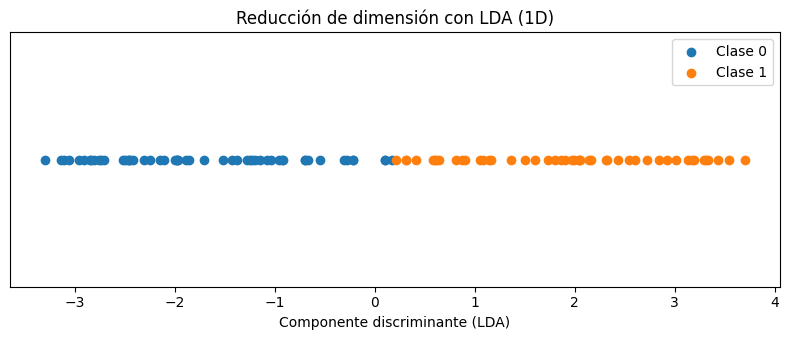

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
mask0 = (y == 0)
mask1 = (y == 1)
plt.scatter(X_lda[mask0, 0], [0]*mask0.sum(), label="Clase 0")
plt.scatter(X_lda[mask1, 0], [0]*mask1.sum(), label="Clase 1")
plt.yticks([])
plt.xlabel("Componente discriminante (LDA)")
plt.title("Reducción de dimensión con LDA (1D)")
plt.legend()
plt.tight_layout()
plt.show()

## 5) Interpretación rápida

- Si las nubes de puntos de cada clase **no se superponen** demasiado en 1D, LDA halló una dirección discriminante efectiva.
- Si todavía hay mezcla, se puede:
  - Probar **otras formas de etiquetar** (por cuartiles, por umbrales distintos).
  - Aumentar el tamaño de la muestra.
  - Probar **modelos** con fronteras no lineales (SVM con kernel, árboles, etc.).
